In [ ]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras import optimizers
import numpy as np

In [ ]:
batch_size = 128

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
def normalize(x):
    mean = np.mean(x, axis = (0, 1, 2, 3))
    std = np.std(x, axis = (0, 1, 2, 3))
    print(mean)
    print(std)
    x = (x - mean) / std
    return x

x_train = normalize(x_train)
x_test = normalize(x_test)

121.93584
68.38902
122.241035
68.63058


In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

In [ ]:
y_train1 = keras.utils.to_categorical(y_train, 100)
y_test1 = keras.utils.to_categorical(y_test, 100)
y_val1 = keras.utils.to_categorical(y_val, 100)

In [ ]:
# Ref: https://github.com/geifmany/cifar-vgg/blob/master/cifar100vgg.py
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3), filters = 64, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 4096, activation = "elu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units = 4096, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units = 100, activation = "softmax"))

In [ ]:
opt = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

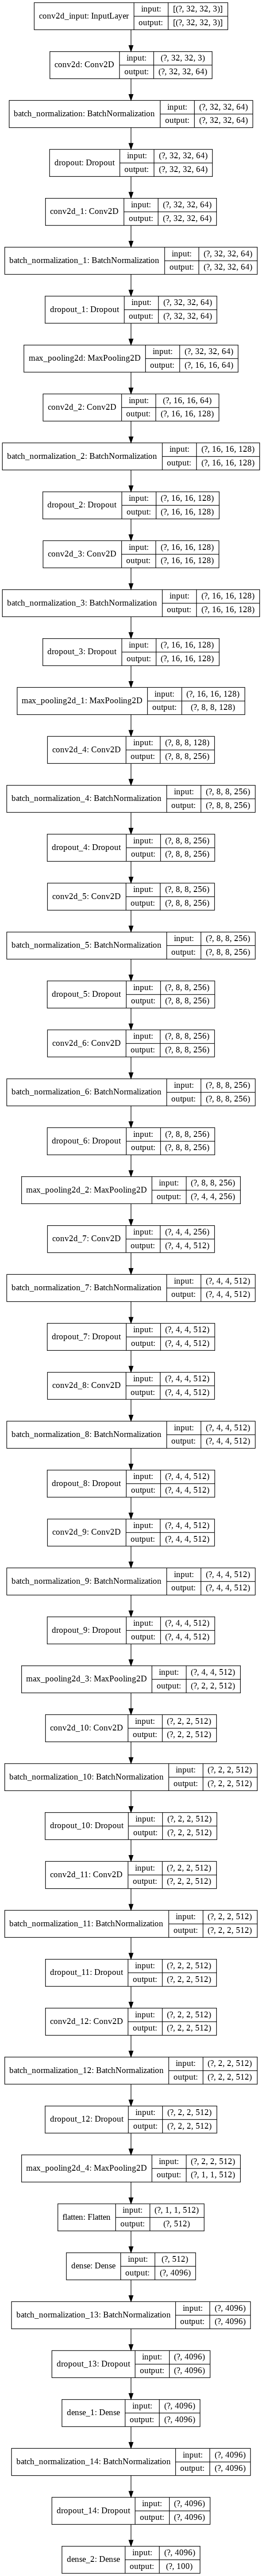

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'VGGNet16.png')

In [ ]:
datagen = ImageDataGenerator(
            rotation_range = 15,
            width_shift_range = 0.1,
            height_shift_range = 0.1,
            horizontal_flip = True)
datagen.fit(x_train)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("VGGNET16_ADAM_BN_Dropouts.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto')
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 20, verbose = 1, mode = 'auto')
hist = model.fit_generator(steps_per_epoch = x_train.shape[0] // batch_size, generator = datagen.flow(x_train, y_train1, batch_size = batch_size), validation_data = (x_val, y_val1), validation_steps = 10,epochs = 200,callbacks = [checkpoint, early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
390/390 [==============================] - ETA: 0s - loss: 7.7472 - accuracy: 0.0138WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0079s vs `on_test_batch_end` time: 0.0651s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.01560, saving model to VGGNET16_SGD_BN_Dropouts.h5
390/390 [==============================] - 38s 99ms/step - loss: 7.7472 - accuracy: 0.0138 - val_loss: 5.1918 - val_accuracy: 0.0156
Epoch 2/200
390/390 [==============================] - ETA: 0s - loss: 4.5999 - accuracy: 0.0204
Epoch 00002: val_accuracy improved from 0.01560 to 0.01760, saving model to VGGNET16_SGD_BN_Dropouts.h5
390/390 [==============================] - 37s 94ms/step - loss: 4.5999 - accuracy: 0.0204 - val_loss: 7.1716 - val_accuracy: 0.0176
Epoch 3/200
390/390 [==============================] - ETA: 0s - loss: 4.5495 - accura

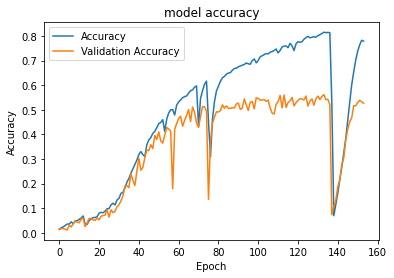

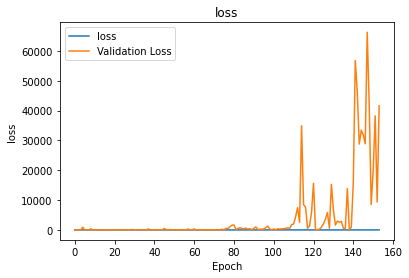

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.savefig('vgg16_adam_acc.png')
plt.show()

plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("loss")
plt.ylabel("loss")        
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.savefig('vgg16_adam_loss.png')
plt.show()


# Evaluation of Model

In [ ]:
from keras.datasets import cifar100
import numpy as np
import keras

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

def normalize(x):
    mean = np.mean(x, axis = (0, 1, 2, 3))
    std = np.std(x, axis = (0, 1, 2, 3))
    print(mean)
    print(std)
    x = (x - mean) / std
    return x

x_train = normalize(x_train)
x_test = normalize(x_test)

y_train1 = keras.utils.to_categorical(y_train, 100)
y_test1 = keras.utils.to_categorical(y_test, 100)

121.93584
68.38902
122.241035
68.63058


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
import os

path = os.path.join(os.path.dirname(os.getcwd()), "weights\VGGNet16_ADAM_Dropouts.h5")
# path = '/content/drive/My Drive/weights/VGGNet16_ADAM_Dropouts.h5'
print(path)
model1 = load_model(path)

/content/drive/My Drive/weights/VGGNet16_ADAM_Dropouts.h5


In [ ]:
_, accuracy = model1.evaluate(x_test, y_test1)

313/313 [==============================] - 3s 8ms/step - loss: 2720.8811 - accuracy: 0.5654


In [ ]:
pred = model1.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(pred, y_test)
cr = classification_report(pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       102
           1       0.65      0.79      0.71        82
           2       0.33      0.62      0.43        53
           3       0.33      0.49      0.39        68
           4       0.35      0.42      0.38        83
           5       0.46      0.90      0.61        51
           6       0.53      0.75      0.62        71
           7       0.65      0.56      0.60       117
           8       0.75      0.82      0.78        92
           9       0.72      0.73      0.72        99
          10       0.49      0.37      0.42       132
          11       0.49      0.52      0.51        94
          12       0.77      0.52      0.62       148
          13       0.43      0.69      0.53        62
          14       0.66      0.27      0.39       242
          15       0.39      0.91      0.55        43
          16       0.72      0.71      0.71       102
          17       0.79    

In [ ]:
np.set_printoptions(threshold = np.inf)
cm

array([[81,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  3,  0,  0,  0,  8,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, 65,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,
         1,  0